<a href="https://colab.research.google.com/github/praveenprabharavindran/MachineLearning/blob/main/ANN_Handwritten_Digits/ANN_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* Import minst dataset



In [1]:
# Import dataset
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('Shape of x_train',x_train.shape)
print('Shape of y_train',y_train.shape)

Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)


In [4]:
y_train[0]

5

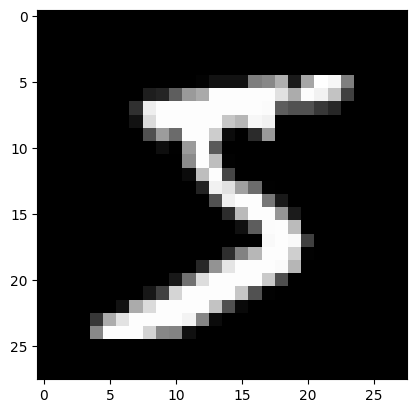

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray')

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

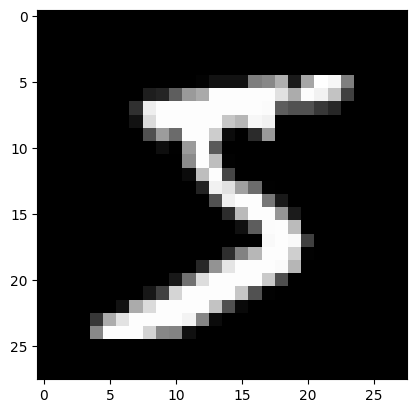

In [9]:
plt.imshow(x_train[0],cmap='gray')

In [10]:
from tensorflow.keras.utils import to_categorical
num_classes=10

In [11]:
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [12]:
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of y_train (60000, 10)
Shape of y_test (10000, 10)


In [13]:
y_train[0]
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

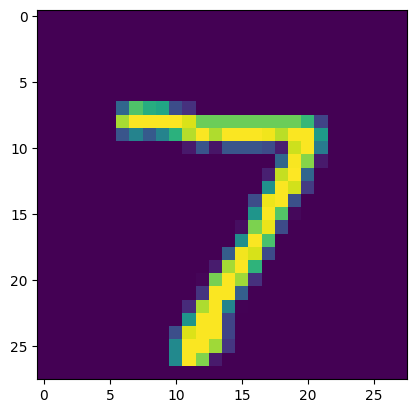

In [14]:
plt.imshow(x_test[0])

In [15]:
x1_train = x_train.reshape(60000,28*28)

In [16]:
x1_train.shape

(60000, 784)

In [17]:
# Create the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [18]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='sigmoid',name='dense-128-relu'))
model.add(Dense(10,activation='softmax',name='dense-10-softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense-128-relu (Dense)      (None, 128)               100480    
                                                                 
 dense-10-softmax (Dense)    (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
batch_size=128
epochs=10

In [22]:
history=model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 7s 13ms/step - loss: 0.5962 - accuracy: 0.8576 - val_loss: 0.3077 - val_accuracy: 0.9174
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2771 - accuracy: 0.9222 - val_loss: 0.2360 - val_accuracy: 0.9321
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2222 - accuracy: 0.9363 - val_loss: 0.2038 - val_accuracy: 0.9398
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1869 - accuracy: 0.9464 - val_loss: 0.1734 - val_accuracy: 0.9483
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1607 - accuracy: 0.9545 - val_loss: 0.1554 - val_accuracy: 0.9546
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1405 - accuracy: 0.9600 - val_loss: 0.1400 - val_accuracy: 0.9584
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1241 - accuracy: 0.9645 - val_loss: 0.1301 - val_accuracy: 0.9625
Epo

In [23]:
score=model.evaluate(x_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0814 - accuracy: 0.9779


In [24]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1049 - accuracy: 0.9668


<function matplotlib.pyplot.show(close=None, block=None)>

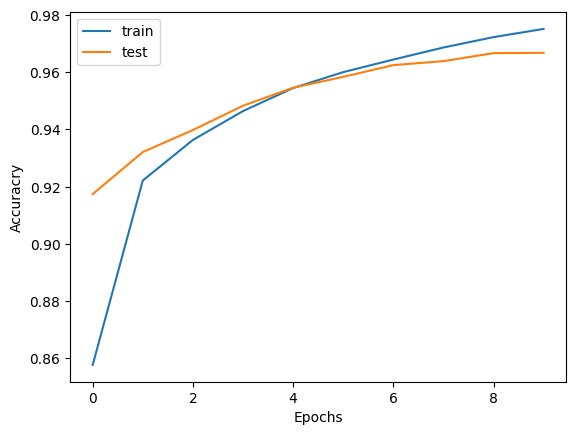

In [25]:
# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracry')
plt.legend(['train','test'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

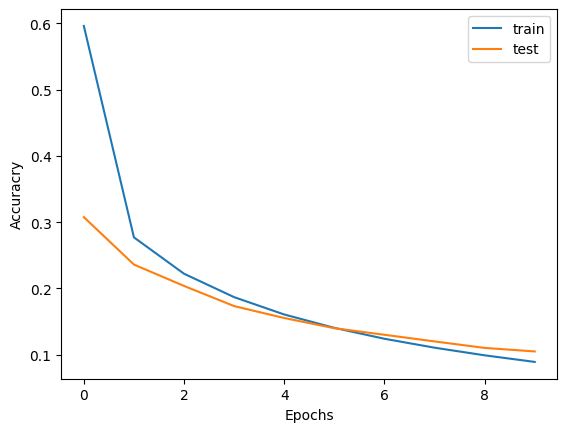

In [26]:
# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracry')
plt.legend(['train','test'])
plt.show

In [27]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [28]:
y_pred.shape

(10000, 10)

In [29]:
import numpy as np

In [30]:
y_pred=np.argmax(y_pred,axis=1)

In [31]:
y_pred.shape

(10000,)

In [32]:
(train_input,train_label),(test_input,test_label)=mnist.load_data()

In [33]:
test_label.shape

(10000,)

In [34]:
print('y_pred',y_pred[:5])
print('test_label',test_label[:5])


y_pred [7 2 1 0 4]
test_label [7 2 1 0 4]


In [35]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(test_label ,y_pred)
print(matrix)

[[ 965    0    1    2    0    4    4    3    1    0]
 [   0 1121    4    0    0    1    4    1    4    0]
 [   8    1  984    5    5    2    4   10   12    1]
 [   0    0    2  979    0   10    0    9    5    5]
 [   1    0    4    1  949    0    5    2    2   18]
 [   4    1    0   10    1  858    7    1    6    4]
 [   7    3    1    0    4    7  932    0    4    0]
 [   1    5    9    7    0    1    0  994    0   11]
 [   3    2    2    9    8    8    2    9  926    5]
 [   2    5    1    9   12    6    1   11    2  960]]


<Axes: >

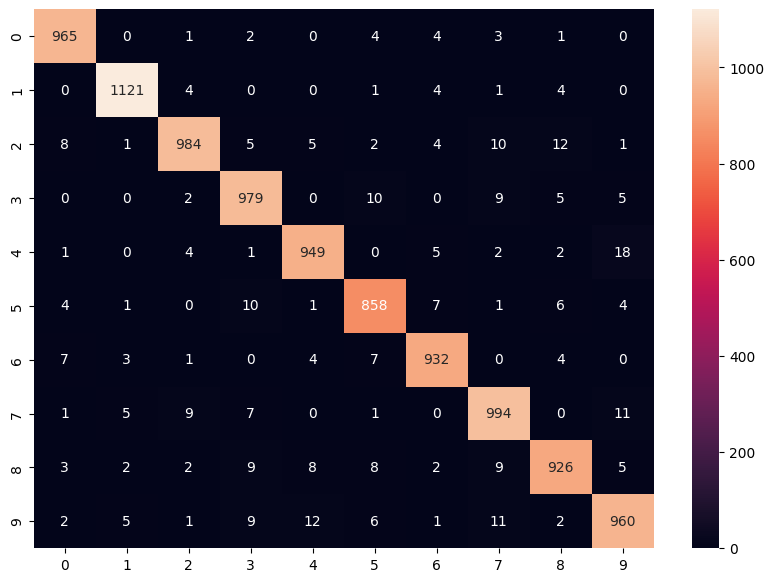

In [36]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='d')

In [37]:
# save model
#model.save("ANN_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
